# 2. Importing Library

In [1]:
# First we will import the necessary Library 


import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pickle

# 3. Loading Dataset

In [2]:
# Load our dataset 
# Note it should be in same dir


maindf=pd.read_csv('DOT-USD.csv')

In [3]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  954
Total number of fields present in the dataset:  7


In [4]:
maindf.shape

(954, 7)

In [5]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-20,2.787857,3.077784,2.692896,2.900080,2.900080,48819867
1,2020-08-21,2.896923,3.090093,2.730919,2.875028,2.875028,49313137
2,2020-08-22,2.878570,4.510613,2.816762,4.484690,4.484690,485801096
3,2020-08-23,4.487058,4.487058,3.716271,3.967066,3.967066,320749483
4,2020-08-24,3.987413,4.783158,3.812670,4.602614,4.602614,407690171


In [6]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
949,2023-03-27,6.052090,6.105624,5.772027,5.873617,5.873617,147793061
950,2023-03-28,5.873514,6.096055,5.806787,6.064447,6.064447,134330840
951,2023-03-29,6.063774,6.277051,6.059022,6.180756,6.180756,164714200
952,2023-03-30,6.181868,6.283161,6.037656,6.118804,6.118804,178190192
953,2023-03-31,6.132834,6.374143,6.107595,6.322111,6.322111,194841072


In [7]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       954 non-null    object 
 1   Open       954 non-null    float64
 2   High       954 non-null    float64
 3   Low        954 non-null    float64
 4   Close      954 non-null    float64
 5   Adj Close  954 non-null    float64
 6   Volume     954 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 52.3+ KB


In [8]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,954.000000,954.000000,954.000000,954.000000,954.000000,9.540000e+02
mean,16.790750,17.555131,15.941955,16.792126,16.792126,1.288259e+09
std,12.560538,13.163980,11.857105,12.555350,12.555350,1.309898e+09
min,2.787857,3.077784,2.692896,2.875028,2.875028,4.881987e+07
25%,6.182765,6.375119,6.044738,6.186214,6.186214,3.773925e+08
50%,12.163219,12.890725,11.144138,12.173001,12.173001,8.286232e+08
75%,25.685489,26.806640,24.152192,25.681497,25.681497,1.730517e+09
max,53.877750,55.004974,52.254654,53.881733,53.881733,1.007000e+10


# Checking for Null Values

In [9]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [10]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [11]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(954, 7)

In [12]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2023-03-30')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2020-08-20,2.787857,3.077784,2.692896,2.900080
1,2020-08-21,2.896923,3.090093,2.730919,2.875028
2,2020-08-22,2.878570,4.510613,2.816762,4.484690
3,2020-08-23,4.487058,4.487058,3.716271,3.967066
4,2020-08-24,3.987413,4.783158,3.812670,4.602614
...,...,...,...,...,...
948,2023-03-26,5.909045,6.105055,5.893980,6.052051
949,2023-03-27,6.052090,6.105624,5.772027,5.873617
950,2023-03-28,5.873514,6.096055,5.806787,6.064447
951,2023-03-29,6.063774,6.277051,6.059022,6.180756


In [13]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,14.265500,14.279453
February,17.673193,17.878702
March,20.205269,20.268209
April,28.764277,28.645455
May,22.203151,21.917429
June,14.476111,14.275329
July,10.742090,10.777109
August,13.804252,14.027538
September,14.478637,14.418138


In [14]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [15]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (954, 2)


In [16]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 5 Year

In [17]:
closedf = closedf[closedf['Date'] > '2022-05-12']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  323


In [18]:
closedf

,Date,Close
631,2022-05-13,10.493300
632,2022-05-14,11.350681
633,2022-05-15,11.795572
634,2022-05-16,10.624635
635,2022-05-17,11.034236
...,...,...
949,2023-03-27,5.873617
950,2023-03-28,6.064447
951,2023-03-29,6.180756
952,2023-03-30,6.118804


In [19]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [20]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(323, 1)


* ### Slicing data into Training set and Testing set

In [21]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (193, 1)
test_data:  (130, 1)


In [22]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (177, 15)
y_train:  (177,)
X_test:  (114, 15)
y_test (114,)


In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (177, 15, 1)
X_test:  (114, 15, 1)


* # Actuall Model Building

In [25]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [26]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
6/6 [==============================] - 2s 61ms/step - loss: 0.1432 - val_loss: 0.0377
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 0.1175 - val_loss: 0.0288
Epoch 3/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0924 - val_loss: 0.0211
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0685 - val_loss: 0.0146
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0487 - val_loss: 0.0097
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0301 - val_loss: 0.0066
Epoch 7/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0161 - val_loss: 0.0055
Epoch 8/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0086 - val_loss: 0.0061
Epoch 9/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0057 - val_loss: 0.0074
Epoch 10/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0064 - val_loss: 0.0080
Epoch 11/200
6/6 [=

- ### Plotting Loss vs Validation loss 

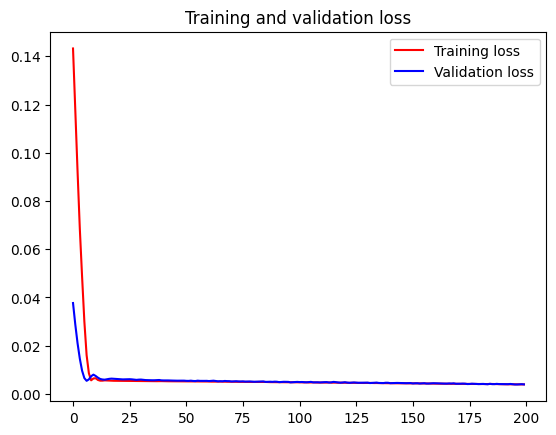

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

4/4 [==============================] - 0s 2ms/step


((177, 1), (114, 1))

- # Model Evaluation

In [29]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## Evaluation metrices RMSE, MSE and MAE

In [30]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.4717765575384584
Train data MSE:  0.22257312024283835
Train data MAE:  0.37291203956664354
-------------------------------------------------------------------------------------
Test data RMSE:  0.4735493643048058
Test data MSE:  0.2242490004334857
Test data MAE:  0.39516326096678617


- ## Variance Regression Score

In [31]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.815165080755281
Test data explained variance regression score: 0.7521805322702242


- ## R square score for regression

In [32]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8149776639567022
Test data R2 score: 0.6835063430450166


- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [33]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.004013411742594258
Test data MGD:  0.007505743909266072
----------------------------------------------------------------------
Train data MPD:  0.02964728778510507
Test data MPD:  0.0407295650999553


In [34]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (323, 1)
Test predicted data:  (323, 1)


- # Predicting next 30 days

In [35]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 7
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  7


- # Plotting last 15 days of dataset and next predicted 30 days

In [36]:
print(lst_output[2])
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[0.2671920359134674]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22]


In [37]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
fbitfile= open("dot.txt", "wb")
pickle.dump((next_predicted_days_value),fbitfile)
fbitfile.close()


- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [38]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()